# Shifted Ackley's function minimization

The goal is to optimize (minimize more precisely) the shifted-Ackley's cost function with many local optima

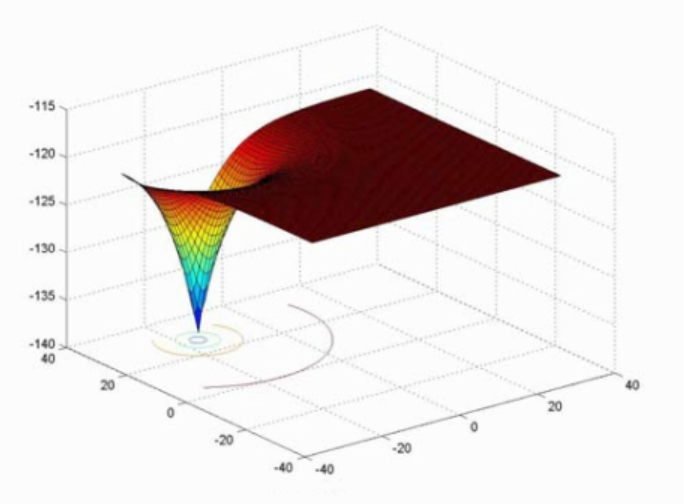

In [39]:
# Import necessaries librairies
import numpy as np
from functools import reduce
import operator
import math
from math import cos,pi,sqrt
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import minimize,dual_annealing,basinhopping
# if not installed
#!pip install autograd
from autograd import grad, jacobian
import time

In [3]:
#Define a bias for the function
f_bias = -140
d50 = 50
shift  = np.random.uniform(-32,32,d50)

In [55]:
def shifted_ackley(x):
    """Shifted-Griewank objective function.

    Has a global minimum at -180 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray"""
    z = x - shift
    z1, z2 = 0, 0
    for i in range(len(x)):
        z1 += z[i] ** 2
        z2 += np.cos(2.0 * np.pi * z[i])
    return (-20.0 * np.exp(-0.2 * np.sqrt(z1 / len(z)))) - np.exp(z2 / len(z)) + np.e + 20.0

In [56]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-32,32,d50)

In [57]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -32 * np.ones(d50)
max_bound_50 = 32 * np.ones(d50)
bounds_50 = list(zip(min_bound_50, max_bound_50))

In [61]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_ackley(x)
    history.append(fobj)

In [65]:
#Set maximum number of iterations
MAX_ITER = 1000

In [68]:
start_time = time.time()
res_50 = minimize(shifted_ackley,x0=x_0_50,method='BFGS',callback = callbackf, options={'disp': True, 'maxiter': MAX_ITER})
res_50
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.
         Current function value: 19.702346
         Iterations: 15
         Function evaluations: 1040
         Gradient evaluations: 20
--- 0.2858912944793701 seconds ---


In [69]:
#Print result of the optimization for the Griewank function (dimension 50) 
res_50

      fun: 19.702346255887093
 hess_inv: array([[ 5.46436516e-01,  5.07922350e-03, -3.76968562e-03, ...,
         6.58904300e-04, -6.00497019e-03, -3.95777162e-03],
       [ 5.07922350e-03,  9.82886904e-01,  1.12869927e-02, ...,
        -6.84949750e-03,  2.07608566e-02,  1.25018084e-02],
       [-3.76968562e-03,  1.12869927e-02,  9.92520875e-01, ...,
         3.63825590e-03, -1.35859498e-02, -8.27130167e-03],
       ...,
       [ 6.58904300e-04, -6.84949750e-03,  3.63825590e-03, ...,
         9.69405909e-01,  1.13718941e-02,  4.40399889e-03],
       [-6.00497019e-03,  2.07608566e-02, -1.35859498e-02, ...,
         1.13718941e-02,  9.74455615e-01, -1.50915559e-02],
       [-3.95777162e-03,  1.25018084e-02, -8.27130167e-03, ...,
         4.40399889e-03, -1.50915559e-02,  9.90847231e-01]])
      jac: array([-3.81469727e-06,  2.62260437e-06, -1.66893005e-06,  4.76837158e-06,
        2.62260437e-06, -4.76837158e-06,  2.38418579e-06,  1.90734863e-06,
       -2.14576721e-06, -2.62260437e-06, 

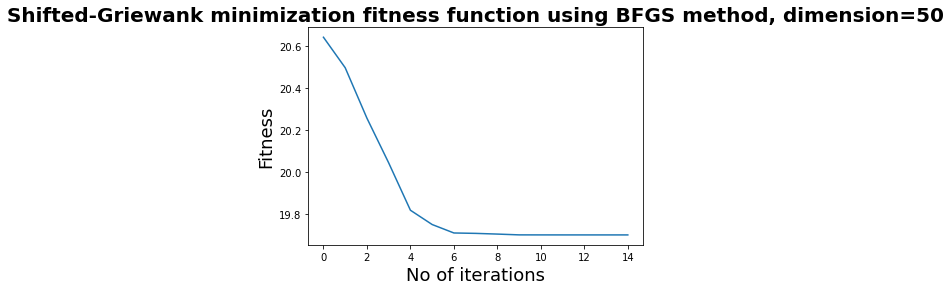

In [72]:
# Plot value of the fitness function 
plt.title("Shifted-Griewank minimization fitness function using BFGS method, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:15])

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [73]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [74]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = list(zip(min_bound_500, max_bound_500))

In [77]:
start_time = time.time()
res_500 = minimize(shifted_ackley,method='BFGS',callback=callbackf,x0=x_0_500, options={'disp': True, 'maxiter': MAX_ITER})
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.
         Current function value: 19.999999
         Iterations: 24
         Function evaluations: 15060
         Gradient evaluations: 30
--- 42.319525718688965 seconds ---


In [78]:
#Print result of the optimization in dimension 500
res_500

      fun: 19.99999878972695
 hess_inv: array([[ 1.01933976e+00, -8.84958015e-03,  3.85527710e-03, ...,
        -1.40410386e-02,  3.76170802e-03, -1.35980459e-03],
       [-8.84958015e-03,  1.00442732e+00, -4.08572641e-03, ...,
         5.12165255e-03, -1.89873324e-03,  6.87971408e-04],
       [ 3.85527710e-03, -4.08572641e-03,  1.09947652e+00, ...,
         2.28758788e-03,  1.88195001e-03, -6.86620469e-04],
       ...,
       [-1.40410386e-02,  5.12165255e-03,  2.28758788e-03, ...,
         1.01474279e+00, -2.12033735e-03,  7.60474230e-04],
       [ 3.76170802e-03, -1.89873324e-03,  1.88195001e-03, ...,
        -2.12033735e-03,  1.00081512e+00, -2.95362336e-04],
       [-1.35980459e-03,  6.87971408e-04, -6.86620469e-04, ...,
         7.60474230e-04, -2.95362336e-04,  1.00010690e+00]])
      jac: array([ 2.38418579e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.38418579e-07,  0.00000000e+00,  0.00000000e+00,  2.38418579e-07,
        0.00000000e+00,  2.38418579e-07,  

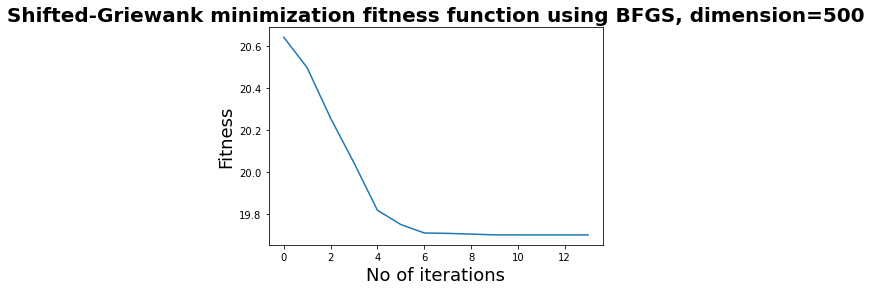

In [80]:
# Plot value of the fitness function 
plt.title("Shifted-Griewank minimization fitness function using BFGS, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:14])

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold before successful termination.

The selected algorithm for this task is the BFGS method. 